# 1. 필요 라이브러리 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import xgboost as xgb
import shap

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
warnings.simplefilter(action='ignore')

# 2. 데이터 불러오기

## Data Dictionary

- id : 샘플 아이디
- Age : 나이
- TypeofContact : 고객의 제품 인지 방법 (회사의 홍보 or 스스로 검색)
- CityTier : 주거 중인 도시의 등급. (인구, 시설, 생활 수준 기준) (1등급 > 2등급 > 3등급) 
- DurationOfPitch : 영업 사원이 고객에게 제공하는 프레젠테이션 기간
- Occupation : 직업
- Gender : 성별
- NumberOfPersonVisiting : 고객과 함께 여행을 계획 중인 총 인원
- NumberOfFollowups : 영업 사원의 프레젠테이션 후 이루어진 후속 조치 수
- ProductPitched : 영업 사원이 제시한 상품
- PreferredPropertyStar : 선호 호텔 숙박업소 등급
- MaritalStatus : 결혼여부
- NumberOfTrips : 평균 연간 여행 횟수
- Passport : 여권 보유 여부 (0: 없음, 1: 있음)
- PitchSatisfactionScore : 영업 사원의 프레젠테이션 만족도
- OwnCar : 자동차 보유 여부 (0: 없음, 1: 있음)
- NumberOfChildrenVisiting : 함께 여행을 계획 중인 5세 미만의 어린이 수
- Designation : (직업의) 직급
- MonthlyIncome : 월 급여
- ProdTaken : 여행 패키지 신청 여부 (0: 신청 안 함, 1: 신청함)

In [3]:
train_data = pd.read_csv("./train.csv")
train_data

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,Self Enquiry,1,10.0,Small Business,Male,3,5.0,Basic,3.0,Single,2.0,0,1,1,2.0,Executive,20723.0,0
1951,1952,41.0,Self Enquiry,3,8.0,Salaried,Female,3,3.0,Super Deluxe,5.0,Divorced,1.0,0,5,1,1.0,AVP,31595.0,0
1952,1953,38.0,Company Invited,3,28.0,Small Business,Female,3,4.0,Basic,3.0,Divorced,7.0,0,2,1,2.0,Executive,21651.0,0
1953,1954,28.0,Self Enquiry,3,30.0,Small Business,Female,3,5.0,Deluxe,3.0,Married,3.0,0,1,1,2.0,Manager,22218.0,0


In [4]:
test_data = pd.read_csv("./test.csv")
test_data

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,32.0,Company Invited,3,NaN,Small Business,Male,2,5.0,Deluxe,3.0,Married,1.0,0,2,0,1.0,Manager,19668.0
1,2,46.0,Self Enquiry,2,11.0,Small Business,Male,3,NaN,Deluxe,4.0,Married,1.0,1,5,0,1.0,Manager,20021.0
2,3,37.0,Self Enquiry,3,22.0,Small Business,Male,3,4.0,Deluxe,3.0,Married,5.0,0,5,1,0.0,Manager,21334.0
3,4,43.0,Self Enquiry,1,36.0,Small Business,Male,3,6.0,Deluxe,3.0,Unmarried,6.0,0,3,1,2.0,Manager,22950.0
4,5,25.0,Self Enquiry,3,7.0,Large Business,Female,4,4.0,Basic,4.0,Unmarried,3.0,1,4,1,3.0,Executive,21880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,2929,54.0,Self Enquiry,1,6.0,Small Business,Female,2,3.0,Super Deluxe,3.0,Single,7.0,0,4,1,1.0,AVP,32328.0
2929,2930,33.0,Self Enquiry,1,9.0,Small Business,Fe Male,4,2.0,Deluxe,3.0,Unmarried,2.0,0,3,0,1.0,Manager,23733.0
2930,2931,33.0,Company Invited,1,31.0,Salaried,Male,4,4.0,Deluxe,3.0,Divorced,3.0,0,4,1,1.0,Manager,23987.0
2931,2932,26.0,Self Enquiry,1,9.0,Small Business,Male,4,2.0,Basic,5.0,Unmarried,2.0,0,2,1,3.0,Executive,22102.0


In [5]:
train_data.info() #데이터 자료형 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1861 non-null   float64
 2   TypeofContact             1945 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1853 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1942 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1945 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1898 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

In [6]:
train_data.isna().sum()

id                            0
Age                          94
TypeofContact                10
CityTier                      0
DurationOfPitch             102
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            13
ProductPitched                0
PreferredPropertyStar        10
MaritalStatus                 0
NumberOfTrips                57
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     27
Designation                   0
MonthlyIncome               100
ProdTaken                     0
dtype: int64

In [7]:
train_data.describe()

,id,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,ProdTaken
count,1955.000000,1861.000000,1955.000000,1853.000000,1955.000000,1942.000000,1945.000000,1898.000000,1955.000000,1955.000000,1955.000000,1928.000000,1855.000000,1955.000000
mean,978.000000,37.462117,1.641432,15.524015,2.922762,3.718332,3.568638,3.255532,0.291049,3.067519,0.619437,1.213174,23624.108895,0.195908
std,564.504207,9.189948,0.908744,8.150057,0.712276,1.004095,0.793196,1.814698,0.454362,1.372915,0.485649,0.859450,5640.482258,0.397000
min,1.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000,0.000000
25%,489.500000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20390.000000,0.000000
50%,978.000000,36.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22295.000000,0.000000
75%,1466.500000,43.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25558.000000,0.000000
max,1955.000000,61.000000,3.000000,36.000000,5.000000,6.000000,5.000000,19.000000,1.000000,5.000000,1.000000,3.000000,98678.000000,1.000000


In [8]:
train_data.describe(include=['O']) #범주형 데이터 확인

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
count,1945,1955,1955,1955,1955,1955
unique,2,4,3,5,4,5
top,Self Enquiry,Salaried,Male,Basic,Married,Executive
freq,1379,965,1207,745,949,745


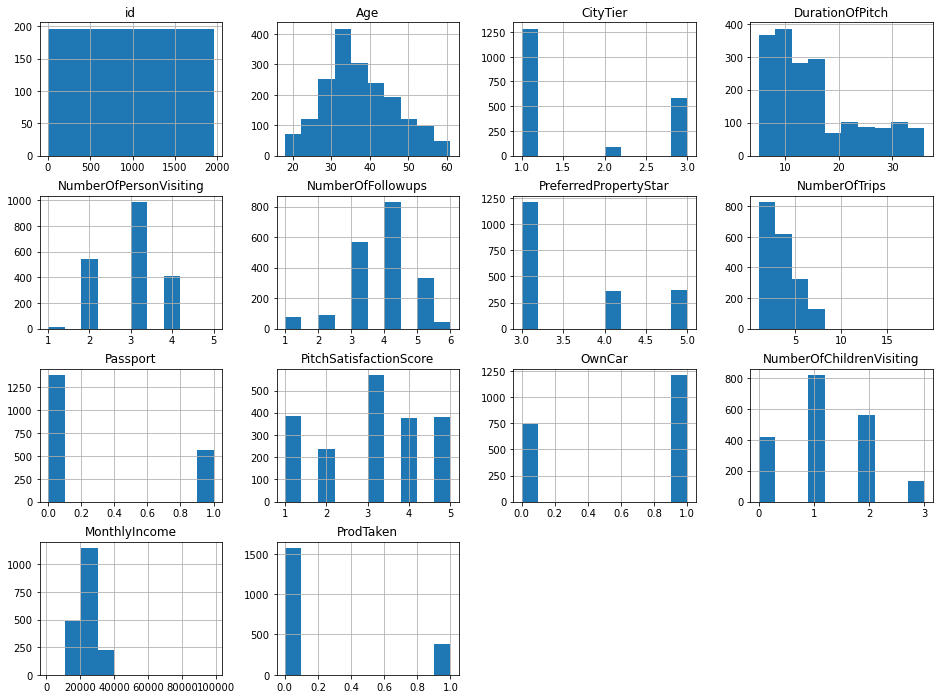

In [9]:
train_data.hist(figsize = (16, 12))
plt.show()

# 3. 데이터 분석 및 전처리

In [10]:
train_data.dropna()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0
5,6,32.0,Self Enquiry,1,29.0,Small Business,Male,4,4.0,Deluxe,3.0,Divorced,3.0,1,5,1,1.0,Manager,24857.0,1
6,7,43.0,Company Invited,3,8.0,Salaried,Male,3,3.0,Deluxe,3.0,Married,2.0,0,3,1,2.0,Manager,20675.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,Self Enquiry,1,10.0,Small Business,Male,3,5.0,Basic,3.0,Single,2.0,0,1,1,2.0,Executive,20723.0,0
1951,1952,41.0,Self Enquiry,3,8.0,Salaried,Female,3,3.0,Super Deluxe,5.0,Divorced,1.0,0,5,1,1.0,AVP,31595.0,0
1952,1953,38.0,Company Invited,3,28.0,Small Business,Female,3,4.0,Basic,3.0,Divorced,7.0,0,2,1,2.0,Executive,21651.0,0
1953,1954,28.0,Self Enquiry,3,30.0,Small Business,Female,3,5.0,Deluxe,3.0,Married,3.0,0,1,1,2.0,Manager,22218.0,0


In [11]:
# 결측치 전처리
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mode()[0])
train_data['TypeofContact'] = train_data['TypeofContact'].fillna(train_data['TypeofContact'].mode()[0])
train_data['DurationOfPitch'] = train_data['DurationOfPitch'].fillna(train_data['DurationOfPitch'].median())
train_data['NumberOfFollowups'] = train_data['NumberOfFollowups'].fillna(train_data['NumberOfFollowups'].median())
train_data['PreferredPropertyStar'] = train_data['PreferredPropertyStar'].fillna(train_data['PreferredPropertyStar'].median())
train_data['NumberOfTrips'] = train_data['NumberOfTrips'].fillna(train_data['NumberOfTrips'].median())
train_data['NumberOfChildrenVisiting'] = train_data['NumberOfChildrenVisiting'].fillna(train_data['NumberOfChildrenVisiting'].mode()[0])
train_data['MonthlyIncome'] = train_data['MonthlyIncome'].fillna(train_data['MonthlyIncome'].median())

In [12]:
train_data.isna().sum()

id                          0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
ProdTaken                   0
dtype: int64

In [13]:
train_data.describe(include=['O']) #범주형 데이터 확인

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
count,1955,1955,1955,1955,1955,1955
unique,2,4,3,5,4,5
top,Self Enquiry,Salaried,Male,Basic,Married,Executive
freq,1389,965,1207,745,949,745


In [14]:
train_data['Gender'].unique()

array(['Male', 'Female', 'Fe Male'], dtype=object)

In [15]:
for i in range(len(train_data['Gender'])) :
    if train_data['Gender'][i] == 'Fe Male' :
        train_data['Gender'][i] = 'Female'
        
train_data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [16]:
lab_enc = LabelEncoder()
train_data['Occupation'] = lab_enc.fit_transform(train_data['Occupation'])
train_data['ProductPitched'] = lab_enc.fit_transform(train_data['ProductPitched'])
train_data['MaritalStatus'] = lab_enc.fit_transform(train_data['MaritalStatus'])
train_data['Designation'] = lab_enc.fit_transform(train_data['Designation'])
train_data['TypeofContact'] = lab_enc.fit_transform(train_data['TypeofContact'])
train_data['Gender'] = lab_enc.fit_transform(train_data['Gender'])
train_data

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,0,1,10.0,3,1,3,4.0,0,3.0,1,3.0,0,1,0,1.0,1,20384.0,0
1,2,34.0,1,3,14.0,3,0,2,4.0,1,4.0,2,1.0,1,5,1,0.0,2,19599.0,1
2,3,45.0,0,1,14.0,2,1,2,3.0,1,4.0,1,2.0,0,4,1,0.0,2,22295.0,0
3,4,29.0,0,1,7.0,3,1,3,5.0,0,4.0,1,3.0,0,4,0,1.0,1,21274.0,1
4,5,42.0,1,3,6.0,2,1,2,3.0,1,3.0,0,2.0,0,3,1,0.0,2,19907.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,1,1,10.0,3,1,3,5.0,0,3.0,2,2.0,0,1,1,2.0,1,20723.0,0
1951,1952,41.0,1,3,8.0,2,0,3,3.0,4,5.0,0,1.0,0,5,1,1.0,0,31595.0,0
1952,1953,38.0,0,3,28.0,3,0,3,4.0,0,3.0,0,7.0,0,2,1,2.0,1,21651.0,0
1953,1954,28.0,1,3,30.0,3,0,3,5.0,1,3.0,1,3.0,0,1,1,2.0,2,22218.0,0


In [17]:
input_data = train_data.drop(['ProdTaken'], axis = 1)
encoding_train_data = pd.get_dummies(input_data)
encoding_train_data

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,28.0,0,1,10.0,3,1,3,4.0,0,3.0,1,3.0,0,1,0,1.0,1,20384.0
1,2,34.0,1,3,14.0,3,0,2,4.0,1,4.0,2,1.0,1,5,1,0.0,2,19599.0
2,3,45.0,0,1,14.0,2,1,2,3.0,1,4.0,1,2.0,0,4,1,0.0,2,22295.0
3,4,29.0,0,1,7.0,3,1,3,5.0,0,4.0,1,3.0,0,4,0,1.0,1,21274.0
4,5,42.0,1,3,6.0,2,1,2,3.0,1,3.0,0,2.0,0,3,1,0.0,2,19907.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1951,28.0,1,1,10.0,3,1,3,5.0,0,3.0,2,2.0,0,1,1,2.0,1,20723.0
1951,1952,41.0,1,3,8.0,2,0,3,3.0,4,5.0,0,1.0,0,5,1,1.0,0,31595.0
1952,1953,38.0,0,3,28.0,3,0,3,4.0,0,3.0,0,7.0,0,2,1,2.0,1,21651.0
1953,1954,28.0,1,3,30.0,3,0,3,5.0,1,3.0,1,3.0,0,1,1,2.0,2,22218.0


In [18]:
train_data.columns

Index(['id', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome',
       'ProdTaken'],
      dtype='object')

In [19]:
train_data['ProdTaken'].unique()

array([0, 1], dtype=int64)

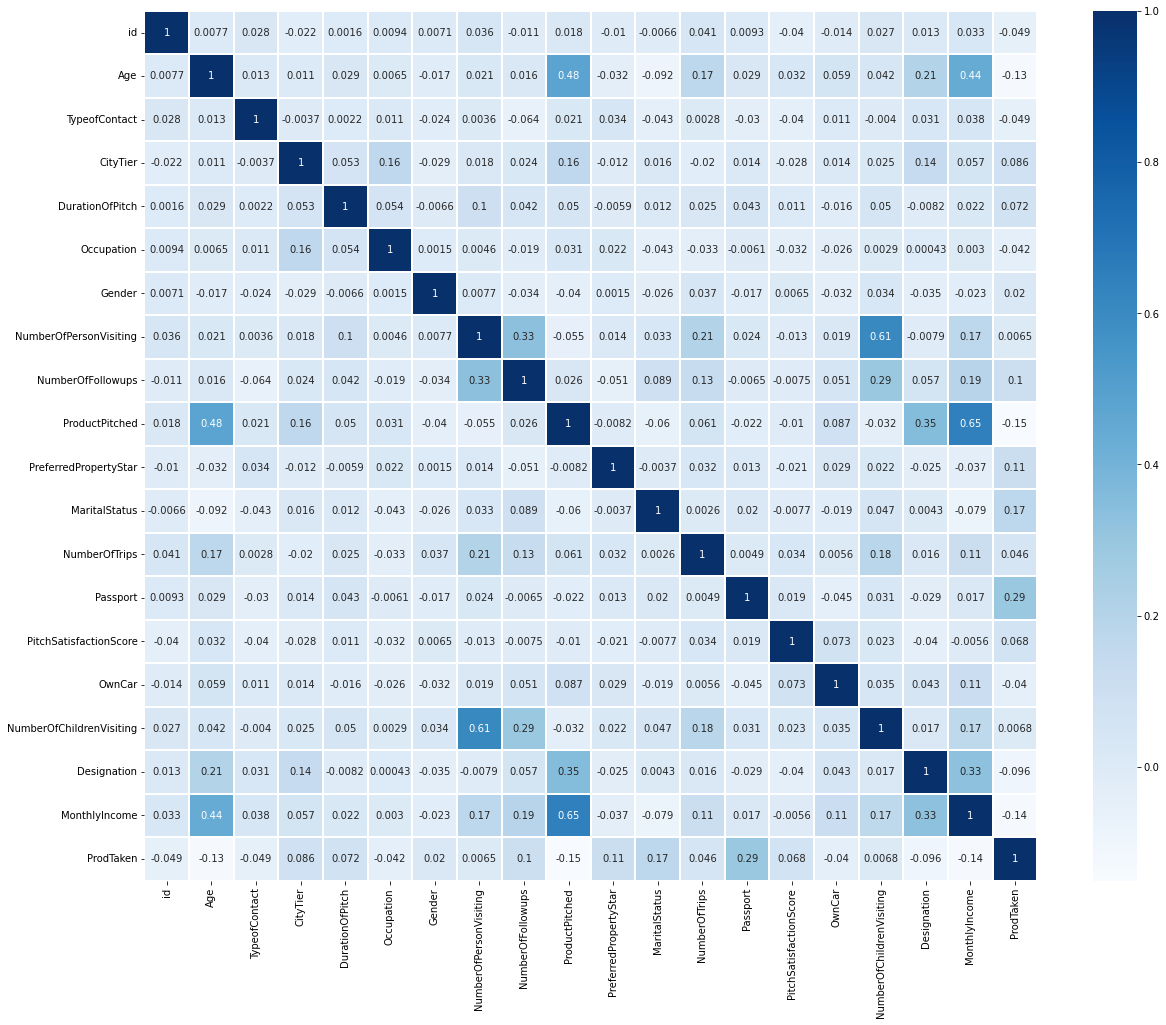

In [20]:
plt.figure(figsize = (20, 16))
x = sns.heatmap(train_data.corr(), cmap = 'Blues', linewidths = '0.1',annot = True)

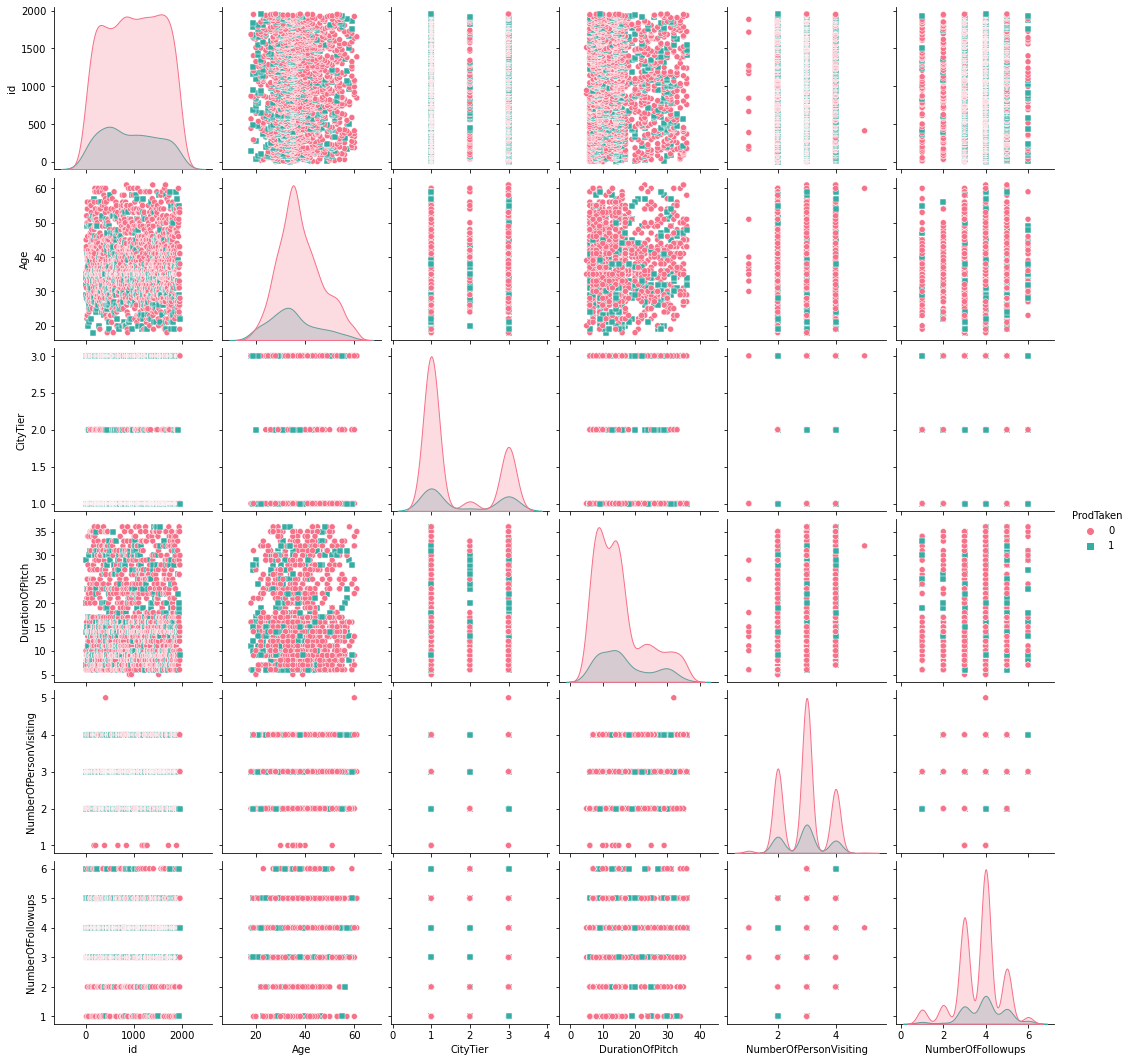

In [31]:
sns.pairplot(encoding_train_data[['id', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'ProdTaken']],hue='ProdTaken', palette='husl', markers=['o','s'])
plt.show()

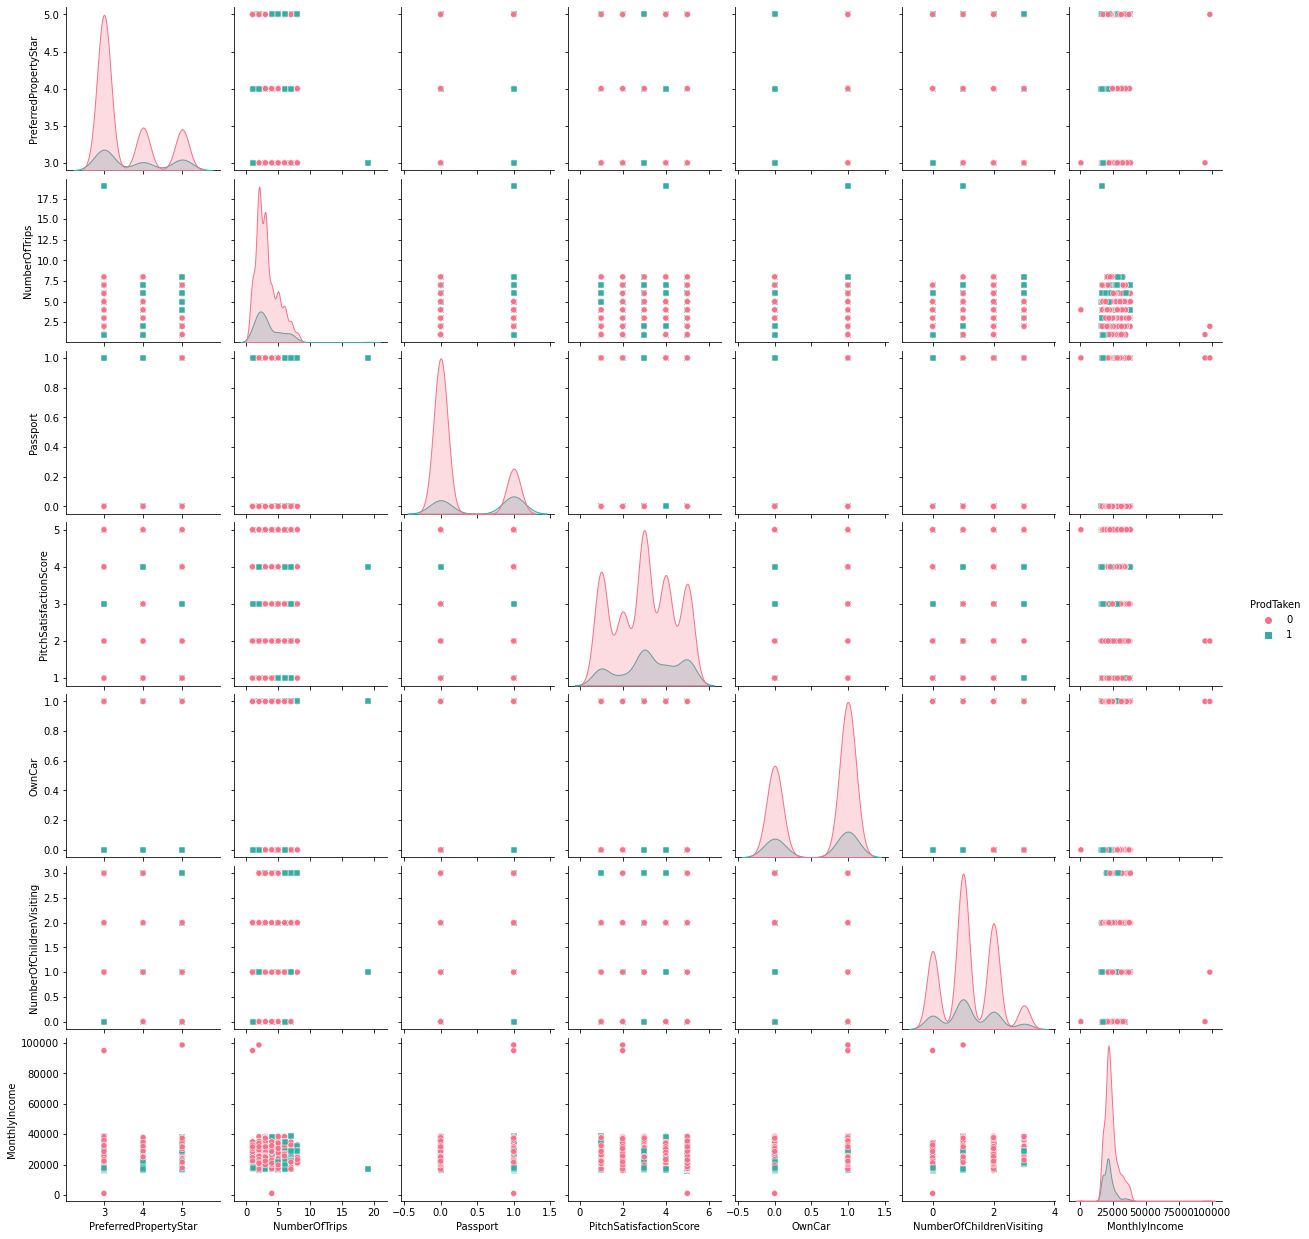

In [32]:
sns.pairplot(encoding_train_data[['PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome', 'ProdTaken']],hue='ProdTaken', palette='husl', markers=['o','s'])
plt.show()

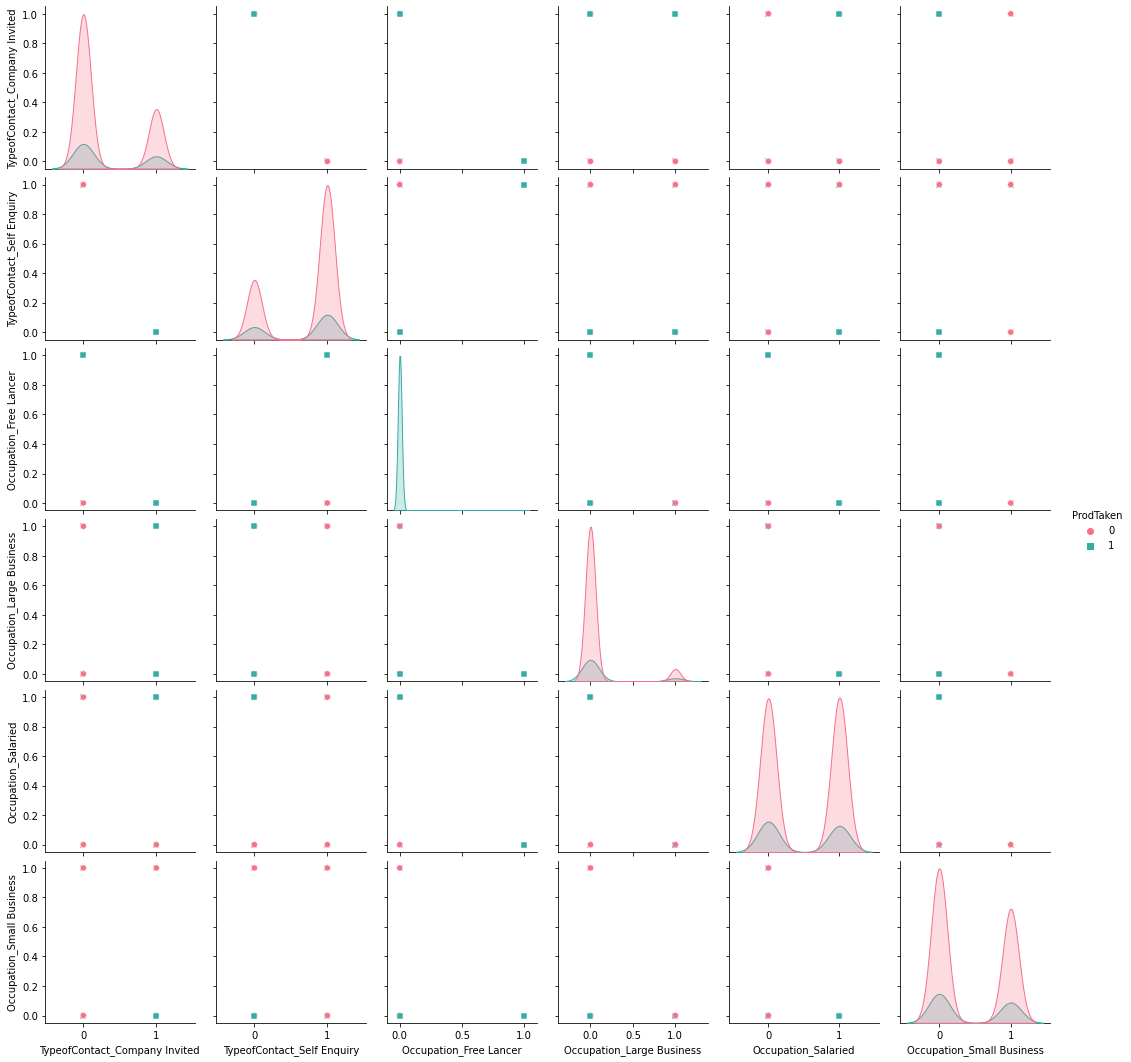

In [33]:
sns.pairplot(encoding_train_data[['TypeofContact_Company Invited', 'TypeofContact_Self Enquiry', 'Occupation_Free Lancer', 'Occupation_Large Business', 'Occupation_Salaried', 'Occupation_Small Business', 'ProdTaken']],hue='ProdTaken', palette='husl', markers=['o','s'])
plt.show()

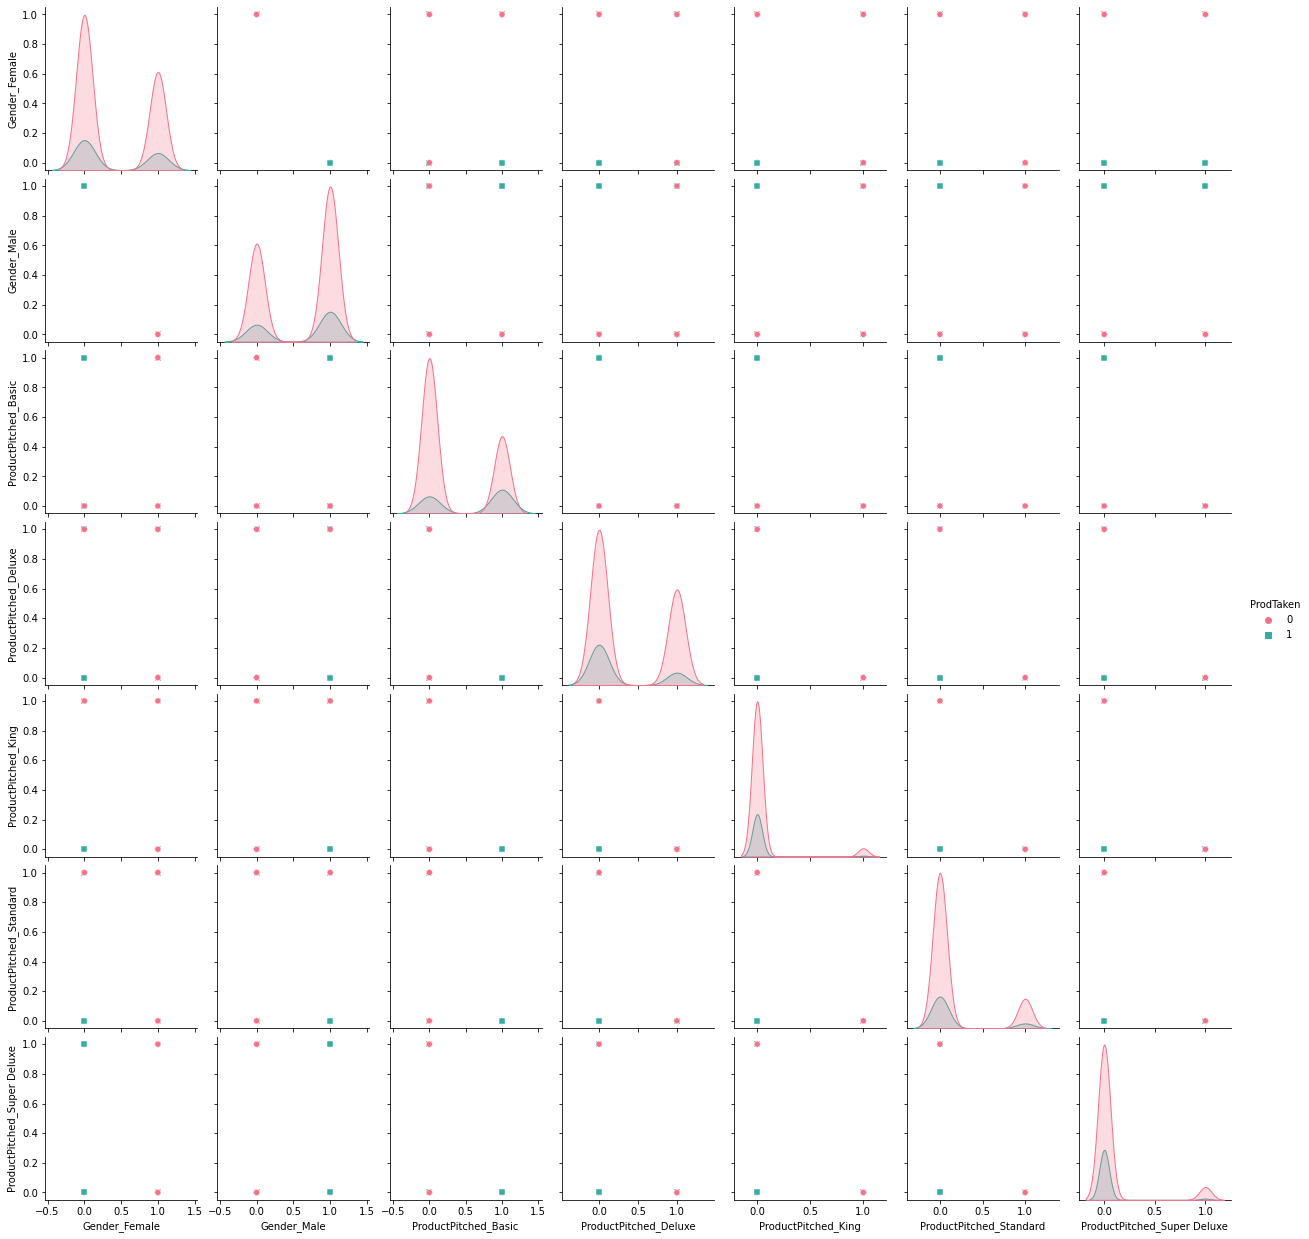

In [34]:
sns.pairplot(encoding_train_data[['Gender_Female','Gender_Male', 'ProductPitched_Basic', 'ProductPitched_Deluxe', 'ProductPitched_King', 'ProductPitched_Standard', 'ProductPitched_Super Deluxe', 'ProdTaken']],hue='ProdTaken', palette='husl', markers=['o','s'])
plt.show()

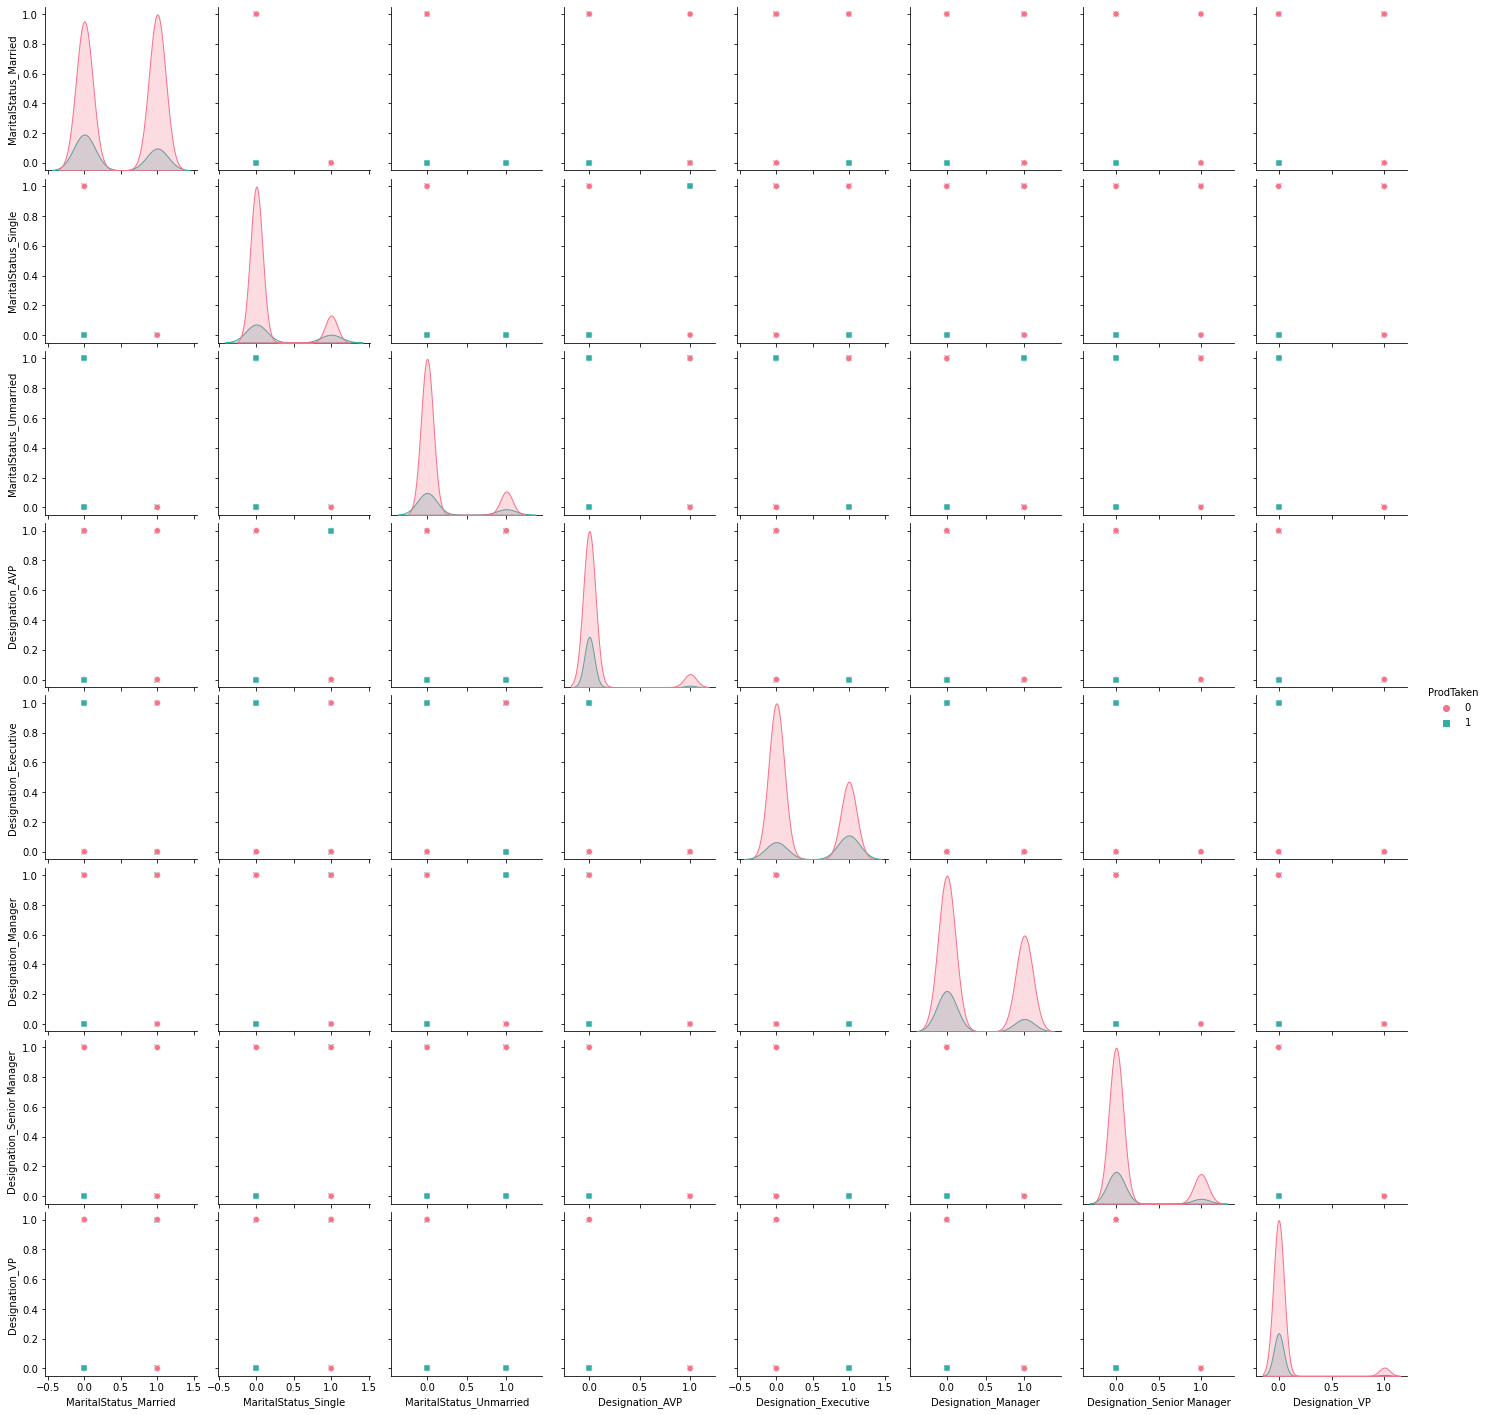

In [35]:
sns.pairplot(encoding_train_data[['MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Unmarried', 'Designation_AVP', 'Designation_Executive', 'Designation_Manager', 'Designation_Senior Manager', 'Designation_VP', 'ProdTaken']],hue='ProdTaken', palette='husl', markers=['o','s'])
plt.show()

In [21]:
encoding_train_data.shape

(1955, 19)

In [22]:
y_target = train_data['ProdTaken']
x_data = train_data.drop(['id', 'ProdTaken', 'NumberOfPersonVisiting', 'NumberOfChildrenVisiting', 'OwnCar'], axis = 1)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size = 0.15, random_state = 0)

In [39]:
params = { 'n_estimators' : [50, 100, 200, 300, 400],
           'max_depth' : [4, 6, 8, 10, 12, 16],
           'min_samples_leaf' : [4, 8, 12, 16, 20], #과적합 제어
           'min_samples_split' : [4, 8, 12, 16, 20] #과적합 제어
         }

grid_re_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(grid_re_clf, param_grid = params, cv = 5, n_jobs = -1)
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 16, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 50}
최고 예측 정확도: 0.8485


In [24]:
# 모델 학습
model = RandomForestClassifier(n_estimators = 50, random_state=0, max_depth = 16, min_samples_leaf = 4, min_samples_split = 4, oob_score=True)
model.fit(x_train, y_train)

pred = model.predict(x_test)

# 평가
print("훈련 세트 정확도: {:.3f}".format(model.score(x_train, y_train)) )
print("테스트 세트 정확도: {:.3f}".format(model.score(x_test, y_test)) )
print("OOB 샘플의 정확도: {:.3f}".format(model.oob_score_) )

훈련 세트 정확도: 0.905
테스트 세트 정확도: 0.884
OOB 샘플의 정확도: 0.847


In [46]:
params = {
    'max_depth':[10, 12, 14, 16],
    'min_child_weight':[4, 6, 8, 10],
    'gamma' : [0, 1, 2],
    'colsample_bytree':[0.7, 0.8, 0.9],
    'n_estimators':[50, 100, 200, 300, 400, 500],
    'eta' : [0.1, 0.15, 0.2]
}

grid_xgb_clf = xgb.XGBClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(grid_xgb_clf, param_grid = params, cv = 5, n_jobs = -1)
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'colsample_bytree': 0.7, 'eta': 0.15, 'gamma': 0, 'max_depth': 16, 'min_child_weight': 4, 'n_estimators': 500}
최고 예측 정확도: 0.8742


In [25]:
xgb_model = xgb.XGBClassifier(eta = 0.15, gamma = 0, max_depth = 16, min_child_weight = 4, n_estimators = 500, colsample_bytree = 0.7)

xgb_model.fit(x_train,y_train)
prediction = xgb_model.predict(x_test)
xgb_score = xgb_model.score(x_test, y_test)
xgb_score

0.9013605442176871

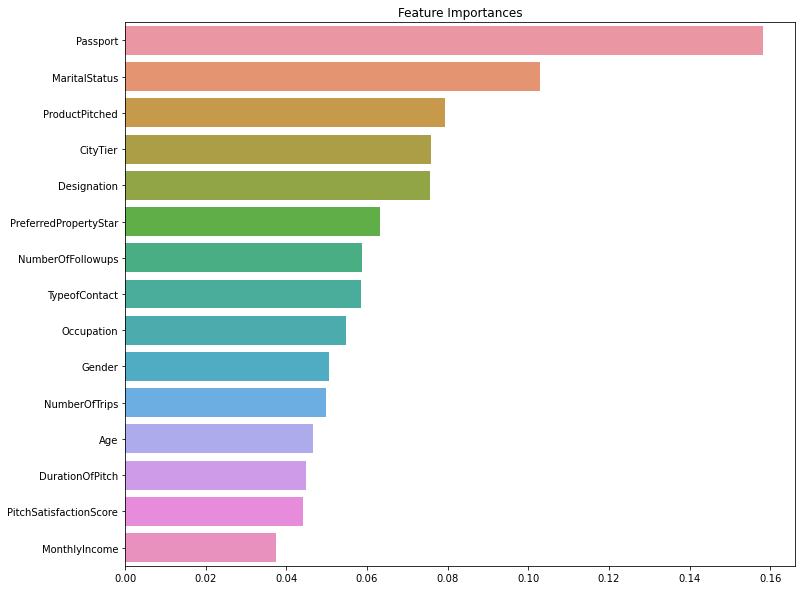

In [26]:
# feature importance

ftr_importances_values = xgb_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_sort = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(12,10))
plt.title('Feature Importances')
sns.barplot(x=ftr_sort, y=ftr_sort.index)
plt.show()

In [27]:
explainer = shap.TreeExplainer(xgb_model) # 트리 모델 Shap Value 계산 객체 지정
shap_values = explainer.shap_values(x_train)

In [28]:
shap.initjs() # 자바스크립트 초기화 (그래프 초기화)
shap.force_plot(explainer.expected_value, shap_values[1,:], x_train.iloc[1,:]) 
# 첫 번째 검증 데이터 인스턴스에 대해 Shap Value를 적용하여 시각화
# 빨간색이 영향도가 높으며, 파란색이 영향도가 낮음

In [29]:
shap.force_plot(explainer.expected_value, shap_values, x_train)

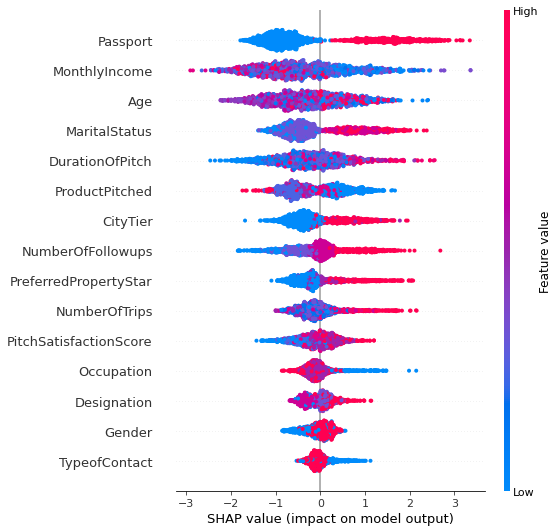

In [30]:
shap.summary_plot(shap_values, x_train)

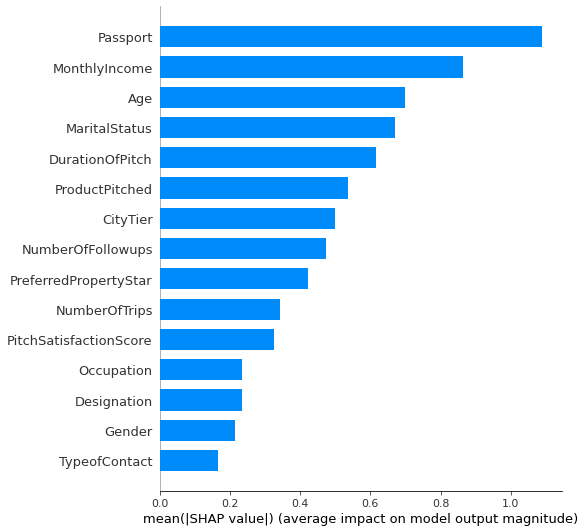

In [31]:
shap.summary_plot(shap_values, x_train, plot_type = "bar") # 각 변수에 대한 Shap Values의 절대값으로 중요도 파악

# Test Data 적용하기

In [32]:
test_data.isna().sum()

id                            0
Age                         132
TypeofContact                15
CityTier                      0
DurationOfPitch             149
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            32
ProductPitched                0
PreferredPropertyStar        16
MaritalStatus                 0
NumberOfTrips                83
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     39
Designation                   0
MonthlyIncome               133
dtype: int64

In [33]:
# 결측치 전처리
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mode()[0])
test_data['TypeofContact'] = test_data['TypeofContact'].fillna(test_data['TypeofContact'].mode()[0])
test_data['DurationOfPitch'] = test_data['DurationOfPitch'].fillna(test_data['DurationOfPitch'].median())
test_data['NumberOfFollowups'] = test_data['NumberOfFollowups'].fillna(test_data['NumberOfFollowups'].median())
test_data['PreferredPropertyStar'] = test_data['PreferredPropertyStar'].fillna(test_data['PreferredPropertyStar'].median())
test_data['NumberOfTrips'] = test_data['NumberOfTrips'].fillna(test_data['NumberOfTrips'].median())
test_data['NumberOfChildrenVisiting'] = test_data['NumberOfChildrenVisiting'].fillna(test_data['NumberOfChildrenVisiting'].mode()[0])
test_data['MonthlyIncome'] = test_data['MonthlyIncome'].fillna(test_data['MonthlyIncome'].median())

In [34]:
for i in range(len(test_data['Gender'])) :
    if test_data['Gender'][i] == 'Fe Male' :
        test_data['Gender'][i] = 'Female'
        
test_data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [35]:
lab_enc = LabelEncoder()
test_data['Occupation'] = lab_enc.fit_transform(test_data['Occupation'])
test_data['ProductPitched'] = lab_enc.fit_transform(test_data['ProductPitched'])
test_data['MaritalStatus'] = lab_enc.fit_transform(test_data['MaritalStatus'])
test_data['Designation'] = lab_enc.fit_transform(test_data['Designation'])
test_data['TypeofContact'] = lab_enc.fit_transform(test_data['TypeofContact'])
test_data['Gender'] = lab_enc.fit_transform(test_data['Gender'])
test_data

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,32.0,0,3,13.0,3,1,2,5.0,1,3.0,1,1.0,0,2,0,1.0,2,19668.0
1,2,46.0,1,2,11.0,3,1,3,4.0,1,4.0,1,1.0,1,5,0,1.0,2,20021.0
2,3,37.0,1,3,22.0,3,1,3,4.0,1,3.0,1,5.0,0,5,1,0.0,2,21334.0
3,4,43.0,1,1,36.0,3,1,3,6.0,1,3.0,3,6.0,0,3,1,2.0,2,22950.0
4,5,25.0,1,3,7.0,1,0,4,4.0,0,4.0,3,3.0,1,4,1,3.0,1,21880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,2929,54.0,1,1,6.0,3,0,2,3.0,4,3.0,2,7.0,0,4,1,1.0,0,32328.0
2929,2930,33.0,1,1,9.0,3,0,4,2.0,1,3.0,3,2.0,0,3,0,1.0,2,23733.0
2930,2931,33.0,0,1,31.0,2,1,4,4.0,1,3.0,0,3.0,0,4,1,1.0,2,23987.0
2931,2932,26.0,1,1,9.0,3,1,4,2.0,0,5.0,3,2.0,0,2,1,3.0,1,22102.0


In [36]:
encoding_test_data = pd.get_dummies(test_data)
encoding_test_data

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,32.0,0,3,13.0,3,1,2,5.0,1,3.0,1,1.0,0,2,0,1.0,2,19668.0
1,2,46.0,1,2,11.0,3,1,3,4.0,1,4.0,1,1.0,1,5,0,1.0,2,20021.0
2,3,37.0,1,3,22.0,3,1,3,4.0,1,3.0,1,5.0,0,5,1,0.0,2,21334.0
3,4,43.0,1,1,36.0,3,1,3,6.0,1,3.0,3,6.0,0,3,1,2.0,2,22950.0
4,5,25.0,1,3,7.0,1,0,4,4.0,0,4.0,3,3.0,1,4,1,3.0,1,21880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,2929,54.0,1,1,6.0,3,0,2,3.0,4,3.0,2,7.0,0,4,1,1.0,0,32328.0
2929,2930,33.0,1,1,9.0,3,0,4,2.0,1,3.0,3,2.0,0,3,0,1.0,2,23733.0
2930,2931,33.0,0,1,31.0,2,1,4,4.0,1,3.0,0,3.0,0,4,1,1.0,2,23987.0
2931,2932,26.0,1,1,9.0,3,1,4,2.0,0,5.0,3,2.0,0,2,1,3.0,1,22102.0


In [37]:
test_data = test_data.drop(['id', 'NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis = 1)
#test_data = test_data.drop(['OwnCar'], axis = 1)
test_data

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome
0,32.0,0,3,13.0,3,1,5.0,1,3.0,1,1.0,0,2,0,2,19668.0
1,46.0,1,2,11.0,3,1,4.0,1,4.0,1,1.0,1,5,0,2,20021.0
2,37.0,1,3,22.0,3,1,4.0,1,3.0,1,5.0,0,5,1,2,21334.0
3,43.0,1,1,36.0,3,1,6.0,1,3.0,3,6.0,0,3,1,2,22950.0
4,25.0,1,3,7.0,1,0,4.0,0,4.0,3,3.0,1,4,1,1,21880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,54.0,1,1,6.0,3,0,3.0,4,3.0,2,7.0,0,4,1,0,32328.0
2929,33.0,1,1,9.0,3,0,2.0,1,3.0,3,2.0,0,3,0,2,23733.0
2930,33.0,0,1,31.0,2,1,4.0,1,3.0,0,3.0,0,4,1,2,23987.0
2931,26.0,1,1,9.0,3,1,2.0,0,5.0,3,2.0,0,2,1,1,22102.0


In [38]:
for_pred = model.predict(test_data)
for_pred

ValueError: X has 16 features, but DecisionTreeClassifier is expecting 15 features as input.

In [30]:
sample_submission = pd.read_csv('./sample_submission.csv')
sample_submission['ProdTaken'] = for_pred
sample_submission.to_csv('submission.csv',index = False)
sample_submission.head()

,id,ProdTaken
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1


In [39]:
xgb_pred = xgb_model.predict(test_data)
xgb_pred

ValueError: Feature shape mismatch, expected: 15, got 16

In [40]:
sample_submission = pd.read_csv('./sample_submission.csv')
sample_submission['ProdTaken'] = xgb_pred
sample_submission.to_csv('submission.csv',index = False)
sample_submission.head()

NameError: name 'xgb_pred' is not defined